# Generates a time series of wave parameters from the WaveWatchIII (WW3) (replicated from 'Wind' notebook)

# Deal with 'grib' files

#### Load GRIB file

It is necessary the 'pygrib' package. I only could install it using the CONDA environment, so, when I need use it, I need to start the Jupyter by the Conda prompt!


And, reminding that to change the 'disk' by the prompt...

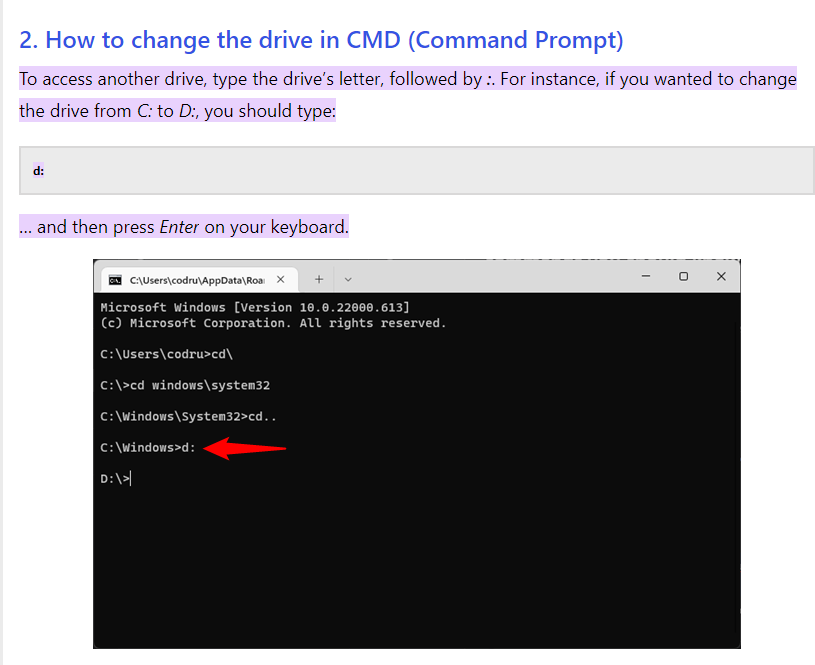

data downloaded from NCEP

https://www.ncei.noaa.gov/data/oceans/ncep/

Global data 'glo_30m'

https://www.youtube.com/watch?v=yLoudFv3hAY

https://www.luisalucchese.com/post/how-to-read-grib2-raster-python/

In [1]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import pickle

In [2]:
path = r'd:\WaveWatch3\Waves\\'
fdir = os.listdir(path)

The data structure of the GRIB files have the results in 3-hours intervals for the model.   
First it comes the U component, than comes the V component, and the number changes depending of the month!

In [3]:
f_dp = []
f_hs = []
f_tp = []
for f in fdir:
    if '.dp.' in f:
        f_dp.append(f)
    elif '.hs.' in f:
        f_hs.append(f)
    elif '.tp.' in f:
        f_tp.append(f)

In [4]:
print(len(f_dp), len(f_hs), len(f_tp))

22 22 22


In [5]:
# https://www.youtube.com/watch?v=kEhcJP3G0xw

grbs = pygrib.open(path + f_dp[0])
grbs.seek(0)

c = 0
for grb in grbs:
    print(grb)
    print(grb.validDate)
    print(grb.date)
    print(grb.time)
    print(grb.name)
    print(grb.units)
    c+=1
    if c == 1:
        break


1:Primary wave direction:Degree true (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201508010000
2015-08-01 00:00:00
20150801
0
Primary wave direction
Degree true


Text(0, 0.5, 'Pontos de grid Y')

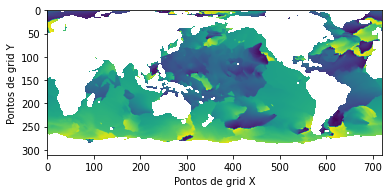

In [6]:
# to see the content of 1 grib
grbs.seek(0)
grb=grbs[1]
plt.imshow(grb.values)
plt.xlabel('Pontos de grid X')
plt.ylabel('Pontos de grid Y')

Text(0, 0.5, 'Latitude')

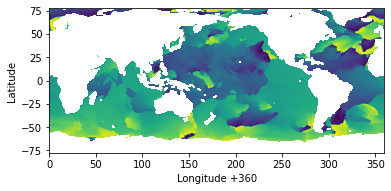

In [7]:
# to see the content of 1 grib
grbs.seek(0)
grb=grbs[1]

# get the values of latitude and longitude for all points of the grid (latitude comes first here!)
lalo = grb.latlons()
lalo = np.array(lalo)

la = lalo[0,:,:]
lo = lalo[1,:,:]

extents = [np.min(lo), np.max(lo), np.min(la), np.max(la)]

plt.imshow(grb.values, extent=extents)
plt.xlabel('Longitude +360')
plt.ylabel('Latitude')

In [8]:
# with open('WW3_coordenadas_malha.pkl', 'wb') as io:
#     pickle.dump(lalo, io)

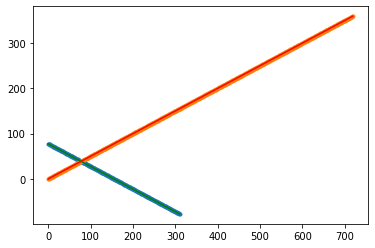

In [9]:
# checking the latitude and longitude

latitudes = lalo[0, :, :]
longitudes = lalo[1, :, :]

lats = latitudes[:,0]
lons = longitudes[0,:]

plt.plot(latitudes[:,0], 'g')
plt.plot(longitudes[0,:], 'r')
plt.plot(lats, '.', color='tab:blue', zorder=0)
plt.plot(lons, '.', color='tab:orange', zorder=0)

In [10]:
latitudes.shape

(311, 720)

In [11]:
# posição do ADCP e da estação meteorológica
adcp_x = -46.564 + 360
adcp_y = -0.672

met_x = -46.6037 + 360
met_y = -0.8301

### The position of the ADCP and the meteorological station in the mesh

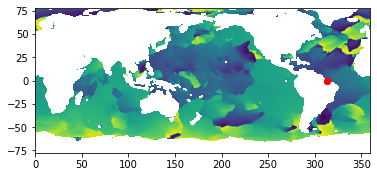

In [12]:
extends = [lons[0], lons[-1], lats[-1], lats[0]]
plt.imshow(grb.values, extent=extends)
# plt.imshow(grb.values)
# plt.plot(longitudes, latitudes, 'k.')
plt.plot(adcp_x, adcp_y, 'ro')
plt.plot(met_x, met_y, 'ro')
# plt.xlim(310,315)
# plt.ylim(-3, 1)
plt.show()

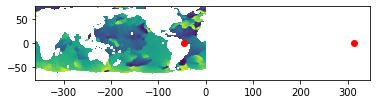

In [13]:

extends = [lons[0]-360, lons[-1]-360, lats[-1], lats[0]]
plt.imshow(grb.values, extent=extends)
# plt.imshow(grb.values)
# plt.plot(longitudes, latitudes, 'k.')
plt.plot(adcp_x-360, adcp_y, 'ro')
plt.plot(met_x, met_y, 'ro')
# plt.xlim(310,315)
# plt.ylim(-3, 1)
plt.show()

## To find the nearest mesh point to the mooring... trying & error!

Changing the values of 'linha' (line) and 'coluna' (column) and changing the values of 'xlim' and 'ylim'


-46.5 -0.5


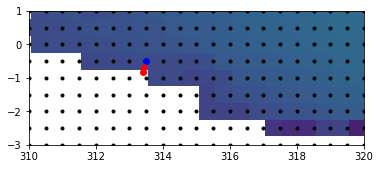

In [14]:
linha = 156
coluna = 627

extends = [lons[0], lons[-1], lats[-1], lats[0]]
plt.imshow(grb.values, extent=extends)
plt.plot(longitudes, latitudes, 'k.')
plt.plot(longitudes[linha, coluna], latitudes[linha, coluna], 'bo')
plt.plot(adcp_x, adcp_y, 'ro')
plt.plot(met_x, met_y, 'ro')
plt.xlim(310,320)
plt.ylim(-3, 1)

print(longitudes[linha, coluna]-360, latitudes[linha, coluna])

plt.show()

## To generate the time series for the selected point

## Takes time! It load each file to select the data

In [15]:
# indexes of the nearest point from the ADCP 
linha = 156
coluna = 627

# variables to be extracted...
# hs, dp and tp
files = f_tp

var = []
t = []
for i in range(len(files)):
    print('Processing ', i, files[i])
    grbs = pygrib.open(path + files[i])
    grbs.seek(0)
    
    t1 = []
    var1 = []

    for grb in grbs:        
        t1.append(grb.validDate)
        var1.append(grb.values[linha, coluna])

                
    t = t + t1
    var = var + var1

Processando  0 multi_1.glo_30m.tp.201508.grb2
Processando  1 multi_1.glo_30m.tp.201509.grb2
Processando  2 multi_1.glo_30m.tp.201510.grb2
Processando  3 multi_1.glo_30m.tp.201511.grb2
Processando  4 multi_1.glo_30m.tp.201512.grb2
Processando  5 multi_1.glo_30m.tp.201601.grb2
Processando  6 multi_1.glo_30m.tp.201602.grb2
Processando  7 multi_1.glo_30m.tp.201603.grb2
Processando  8 multi_1.glo_30m.tp.201604.grb2
Processando  9 multi_1.glo_30m.tp.201605.grb2
Processando  10 multi_1.glo_30m.tp.201606.grb2
Processando  11 multi_1.glo_30m.tp.201607.grb2
Processando  12 multi_1.glo_30m.tp.201608.grb2
Processando  13 multi_1.glo_30m.tp.201609.grb2
Processando  14 multi_1.glo_30m.tp.201610.grb2
Processando  15 multi_1.glo_30m.tp.201611.grb2
Processando  16 multi_1.glo_30m.tp.201612.grb2
Processando  17 multi_1.glo_30m.tp.201701.grb2
Processando  18 multi_1.glo_30m.tp.201702.grb2
Processando  19 multi_1.glo_30m.tp.201703.grb2
Processando  20 multi_1.glo_30m.tp.201704.grb2
Processando  21 multi_1

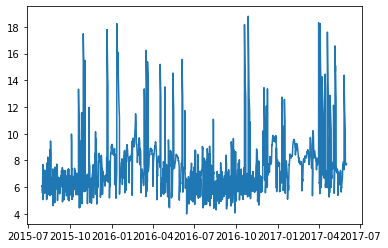

In [16]:
plt.plot(t, var)


In [19]:
print(t[0:3])

[datetime.datetime(2015, 8, 1, 0, 0), datetime.datetime(2015, 8, 1, 3, 0), datetime.datetime(2015, 8, 1, 6, 0)]


In [20]:
# j = [t, var]
# with open('WW3_periodo_bragranca20152017.pkl', 'wb') as io:
#     pickle.dump(j, io)

https://stackoverflow.com/questions/67729984/accessing-noaa-ftp-server-in-python

In [ ]:
from ftplib import FTP
from pathlib import Path

ftp = FTP("ftp.gml.noaa.gov")
ftp.login()
ftp.cwd('data/radiation/surfrad/Boulder_CO/2020')

# Get all files
files = ftp.nlst()

# Download all the files to C:\Temp
for file in files:
    print("Downloading..." + file)
    ftp.retrbinary(f'RETR {file}', open(str(Path(r'C:\Temp') / file), 'wb').write)
ftp.close()

In [ ]:
from ftplib import FTP
from pathlib import Path

ftp = FTP("www.ncei.noaa.gov")
ftp.login()
ftp.cwd('data/oceans/ncep/nww3/2015/08/glo_30m')

# Get all files
files = ftp.nlst()

# Download all the files to C:\Temp
for file in files:
    if 'wind' in file:
        print("Downloading..." + file)
        ftp.retrbinary(f'RETR {file}', open(str(Path(r'C:\Temp') / file), 'wb').write)
ftp.close()